# Random Forest

## Data Preparation

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import the prepared data set
dat = pd.read_csv('../../results/df_agg_hourly.csv')

# Check the data
dat.head()

,Standort,Date,Time,Datetime,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,Ost,Nord,...,WVv [m/s],p [hPa],Year,AnzBestWir,bezeichnung,fk_zaehler,richtung_in,richtung_out,korrekturfaktor,geometry
0,20,2023-01-01,00:00,2023-01-01 00:00,0.0,0.0,46.0,31.0,2682689,1247735,...,0.873333,972.443333,2023.0,447082.0,Militärbrücke,U15G3063864,Löwenplatz,Langstrasse,0.58,POINT (2682689 1247734.9)
1,20,2023-01-01,01:00,2023-01-01 01:00,0.0,0.0,43.0,94.0,2682689,1247735,...,1.490000,972.676667,2023.0,447082.0,Militärbrücke,U15G3063864,Löwenplatz,Langstrasse,0.58,POINT (2682689 1247734.9)
2,20,2023-01-01,02:00,2023-01-01 02:00,0.0,0.0,36.0,27.0,2682689,1247735,...,0.593333,972.620000,2023.0,447082.0,Militärbrücke,U15G3063864,Löwenplatz,Langstrasse,0.58,POINT (2682689 1247734.9)
3,20,2023-01-01,03:00,2023-01-01 03:00,0.0,0.0,22.0,27.0,2682689,1247735,...,0.670000,972.910000,2023.0,447082.0,Militärbrücke,U15G3063864,Löwenplatz,Langstrasse,0.58,POINT (2682689 1247734.9)
4,20,2023-01-01,04:00,2023-01-01 04:00,0.0,0.0,11.0,33.0,2682689,1247735,...,1.420000,972.956667,2023.0,447082.0,Militärbrücke,U15G3063864,Löwenplatz,Langstrasse,0.58,POINT (2682689 1247734.9)


In [3]:
# What are the different variables
dat.columns

Index(['Standort', 'Date', 'Time', 'Datetime', 'VELO_IN', 'VELO_OUT',
       'FUSS_IN', 'FUSS_OUT', 'Ost', 'Nord', 'Hr [%Hr]', 'RainDur [min]',
       'StrGlo [W/m2]', 'T [°C]', 'WD [°]', 'WVs [m/s]', 'WVv [m/s]',
       'p [hPa]', 'Year', 'AnzBestWir', 'bezeichnung', 'fk_zaehler',
       'richtung_in', 'richtung_out', 'korrekturfaktor', 'geometry'],
      dtype='object')

### Extract Hours and Months from the Data

In [4]:
# Extract the hours from the time column
dat['hour'] = pd.to_datetime(dat['Time']).dt.hour

# Check the data
dat['hour'].head()

/var/folders/m_/kjymw9sd0yn2wk8yjj853n_c0000gn/T/ipykernel_83370/4093744424.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dat['hour'] = pd.to_datetime(dat['Time']).dt.hour


0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int32

In [5]:
# Get the month from the Date column
dat['month'] = pd.to_datetime(dat['Date']).dt.month

# Check the data
dat['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int32

### Total Counts for the Bike and Foot Traffic

In [6]:
# Add up the bycicle and pedestrian counts
dat['bike_tot'] = dat['VELO_IN'] + dat['VELO_OUT']
dat['ped_tot'] = dat['FUSS_IN'] + dat['FUSS_OUT']

### NA handling

In [7]:
# Are there NAs in the data?
print(dat.isna().sum())

Standort              0
Date                  0
Time                  0
Datetime              0
VELO_IN               0
VELO_OUT              0
FUSS_IN               0
FUSS_OUT              0
Ost                   0
Nord                  0
Hr [%Hr]              0
RainDur [min]         0
StrGlo [W/m2]         0
T [°C]                0
WD [°]                0
WVs [m/s]             0
WVv [m/s]             0
p [hPa]               0
Year                  0
AnzBestWir            0
bezeichnung           0
fk_zaehler            0
richtung_in           0
richtung_out       3791
korrekturfaktor       0
geometry              0
hour                  0
month                 0
bike_tot              0
ped_tot               0
dtype: int64


In [8]:
# Let's have a look at the data types
dat.dtypes

Standort             int64
Date                object
Time                object
Datetime            object
VELO_IN            float64
VELO_OUT           float64
FUSS_IN            float64
FUSS_OUT           float64
Ost                  int64
Nord                 int64
Hr [%Hr]           float64
RainDur [min]      float64
StrGlo [W/m2]      float64
T [°C]             float64
WD [°]             float64
WVs [m/s]          float64
WVv [m/s]          float64
p [hPa]            float64
Year               float64
AnzBestWir         float64
bezeichnung         object
fk_zaehler          object
richtung_in         object
richtung_out        object
korrekturfaktor    float64
geometry            object
hour                 int32
month                int32
bike_tot           float64
ped_tot            float64
dtype: object

In [38]:
# Extract the day of the week from the Date column
dat['dow'] = pd.to_datetime(dat['Date']).dt.dayofweek

# Check the data
dat['dow'].head()

0    6
1    6
2    6
3    6
4    6
Name: dow, dtype: int32

In [81]:
dat.columns

# Make Standort a categorical variable
dat['Standort'] = dat['Standort'].astype('category')

# Select the variables we want to use
X = dat[['Standort', 'hour', 'month', 'RainDur [min]', 'T [°C]', 'Hr [%Hr]', 'WD [°]', 'WVs [m/s]', 'p [hPa]', 'dow', 'AnzBestWir']]
y_bike = dat['bike_tot']
y_ped = dat['ped_tot']

## Model for Bike Traffic

First we have to define the target variable and the features.

In [82]:
# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y_bike, test_size=0.3, random_state=42)

# Check the shapes of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(154753, 11) (66323, 11) (154753,) (66323,)


/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hour', ylabel='Count'>

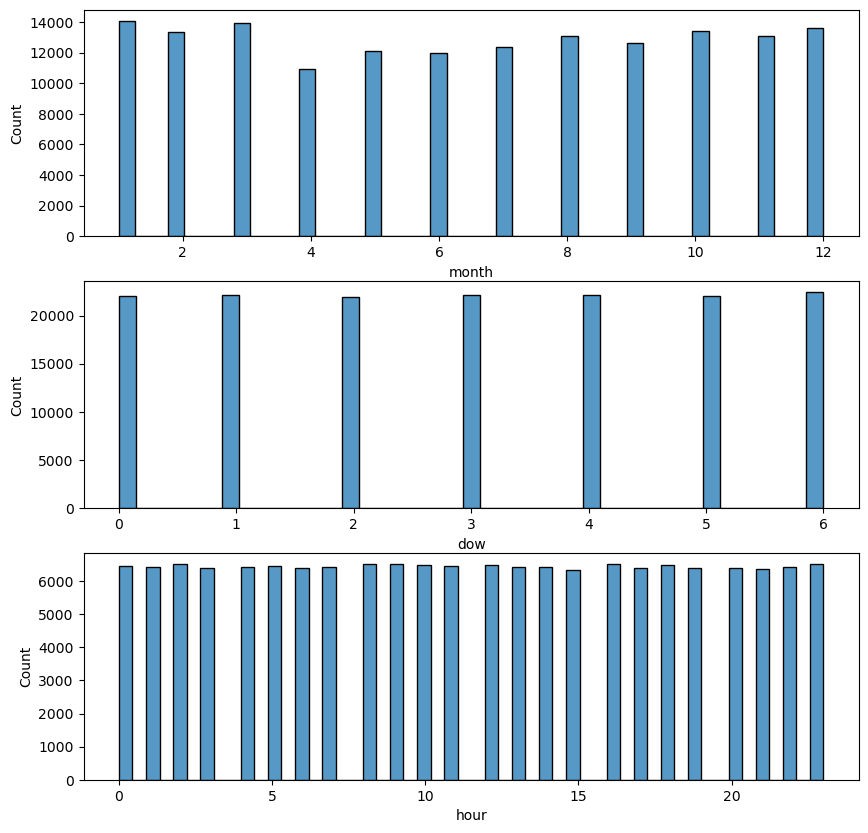

In [83]:
# Plot the distribution of the months, weekdays and hours in seperate plots
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(X_train['month'], ax=ax[0])
sns.histplot(X_train['dow'], ax=ax[1])
sns.histplot(X_train['hour'], ax=ax[2])

In [84]:
# Fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_bike = model.fit(X_train, y_train)

In [85]:
# Predict on test set
y_pred = RF_bike.predict(X_test)

# Calculate the root mean squared error (RMSE)
print("RMSE \t", np.sqrt(mean_squared_error(y_test, y_pred)))

# Calculate the R2 score
print("R^2 \t", r2_score(y_test, y_pred))

RMSE 	 18.67998250672246
R^2 	 0.9317548357285479


<Axes: >

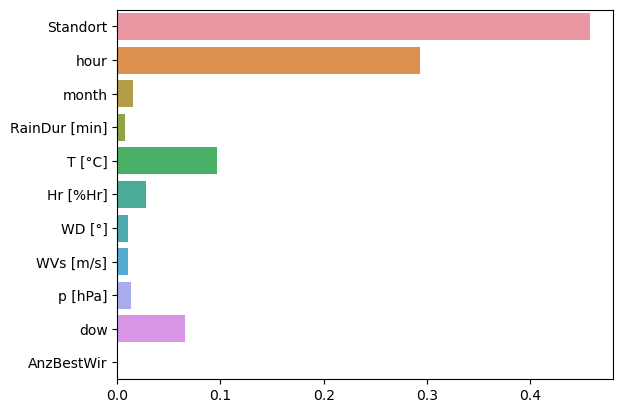

In [86]:
# Check the importance of the variables
importances = RF_bike.feature_importances_

# Plot the importance of the variables
sns.barplot(x=importances, y=X.columns)

## Model for Foot Traffic

In [58]:
# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y_ped, test_size=0.3, random_state=42)

# Check the shapes of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(154753, 10) (66323, 10) (154753,) (66323,)


/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hour', ylabel='Count'>

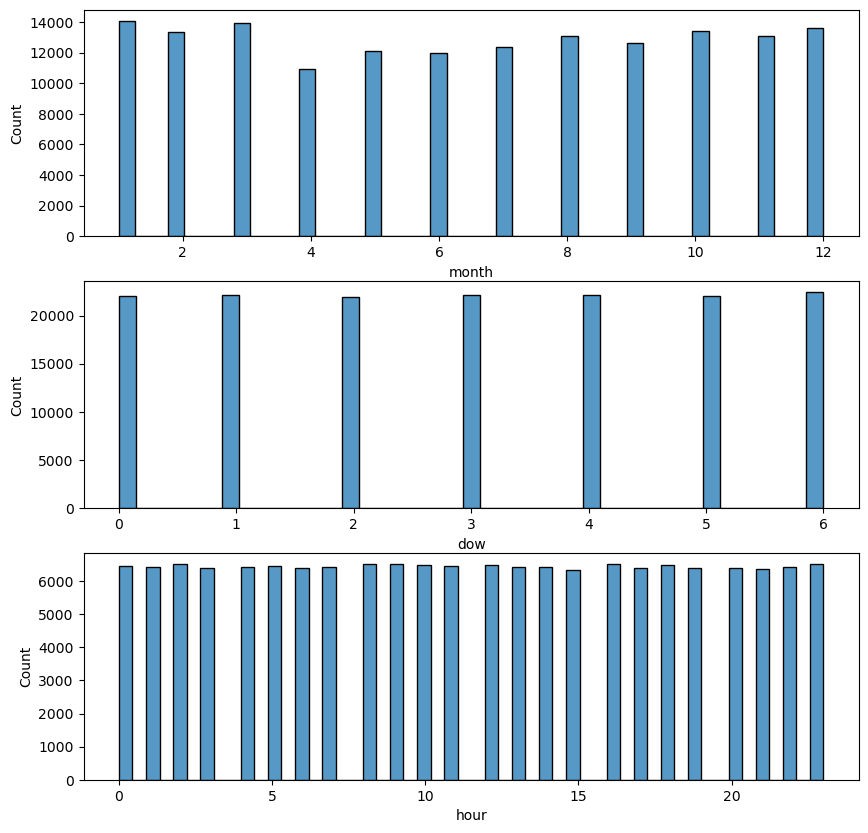

In [60]:
# Plot the distribution of the months, weekdays and hours in seperate plots
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(X_train['month'], ax=ax[0])
sns.histplot(X_train['dow'], ax=ax[1])
sns.histplot(X_train['hour'], ax=ax[2])

In [48]:
# Fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_ped = model.fit(X_train, y_train)

In [49]:
# Predict on test set
y_pred = RF_ped.predict(X_test)

# Calculate the root mean squared error (RMSE)
print("RMSE \t", np.sqrt(mean_squared_error(y_test, y_pred)))

# Calculate the R2 score
print("R^2 \t", r2_score(y_test, y_pred))

RMSE 	 19.773765652542284
R^2 	 0.9367823133960695


<Axes: >

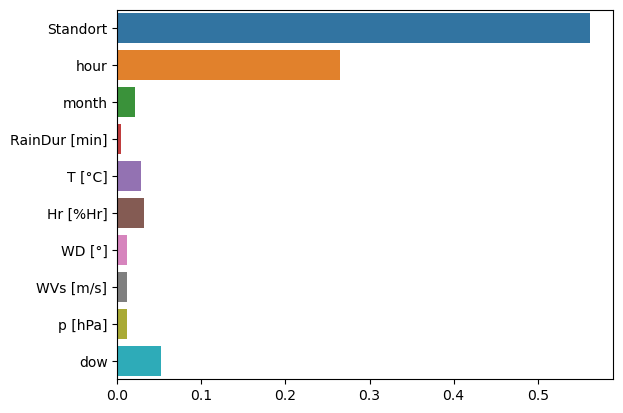

In [50]:
# Check the importance of the variables
importances = RF_ped.feature_importances_

# Plot the importance of the variables
sns.barplot(x=importances, y=X.columns)

## 2022 Data with predictions for 2023

In [67]:
# Import the 2022 data
dat_2022 = pd.read_csv('../../results/df_agg_hourly_2022.csv')

In [68]:
# Are there NAs in the data?
print(dat_2022.isna().sum())

Standort           0
Date               0
Time               0
Datetime           0
VELO_IN            0
VELO_OUT           0
FUSS_IN            0
FUSS_OUT           0
Ost                0
Nord               0
Hr [%Hr]           0
RainDur [min]      0
StrGlo [W/m2]      0
T [°C]             0
WD [°]             0
WVs [m/s]          0
WVv [m/s]          0
p [hPa]            0
Year               0
AnzBestWir         0
bezeichnung        0
fk_zaehler         0
richtung_in        0
richtung_out       0
korrekturfaktor    0
geometry           0
dtype: int64


In [87]:
# Let's extract the hours from the time column
dat_2022['hour'] = pd.to_datetime(dat_2022['Time']).dt.hour

# Let's get the month from the Date column
dat_2022['month'] = pd.to_datetime(dat_2022['Date']).dt.month

# Add up the bycicle and pedestrian counts
dat_2022['bike_tot'] = dat_2022['VELO_IN'] + dat_2022['VELO_OUT']
dat_2022['ped_tot'] = dat_2022['FUSS_IN'] + dat_2022['FUSS_OUT']

# Extract the day of the week from the Date column
dat_2022['dow'] = pd.to_datetime(dat_2022['Date']).dt.dayofweek

# Make Standort a categorical variable
dat_2022['Standort'] = dat_2022['Standort'].astype('category')

# Select the variables we want to use
X_2022 = dat_2022[['Standort', 'hour', 'month', 'RainDur [min]', 'T [°C]', 'Hr [%Hr]', 'WD [°]', 'WVs [m/s]', 'p [hPa]', 'dow', 'AnzBestWir']]
y_bike_2022 = dat_2022['bike_tot']
y_ped_2022 = dat_2022['ped_tot']

# Data shapes
print(X_2022.shape, y_bike_2022.shape, y_ped_2022.shape)

(209713, 11) (209713,) (209713,)


/var/folders/m_/kjymw9sd0yn2wk8yjj853n_c0000gn/T/ipykernel_83370/2226095175.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dat_2022['hour'] = pd.to_datetime(dat_2022['Time']).dt.hour


In [89]:
# Let's fit the bike data model
model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_bike_2022 = model.fit(X_2022, y_bike_2022)

# Predictions
y_pred = RF_bike_2022.predict(X)

# Calculate the root mean squared error (RMSE)
print("RMSE \t", np.sqrt(mean_squared_error(y_bike, y_pred)))

# Calculate the R2 score
print("R^2 \t", r2_score(y_bike, y_pred))

RMSE 	 43.315389128474784
R^2 	 0.6359308230315162


<Axes: >

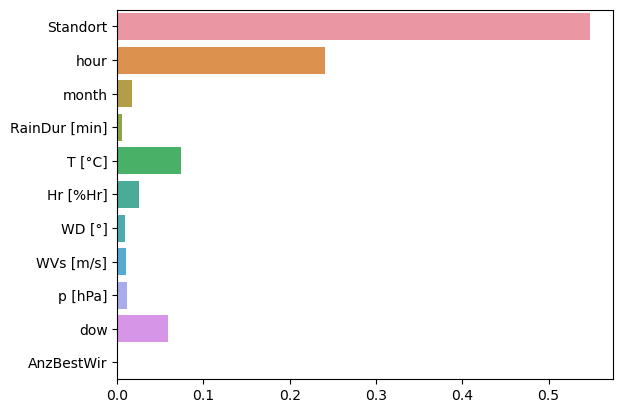

In [90]:
# Influence plot
importances = RF_bike_2022.feature_importances_
sns.barplot(x=importances, y=X_2022.columns)

/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Axes: xlabel='Date', ylabel='bike_tot'>

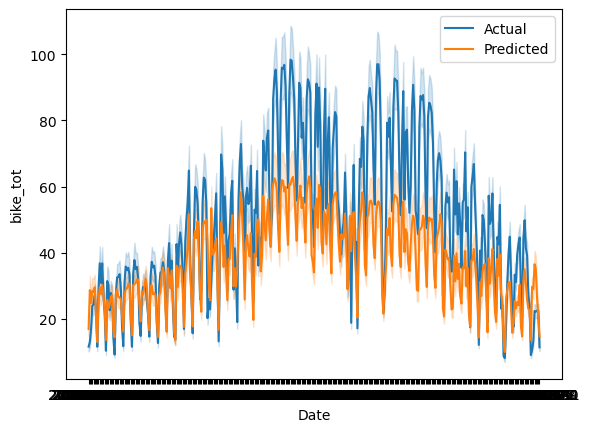

In [91]:
# Let's plot the predictions vs actual values for the month of June
sns.lineplot(x=dat['Date'], y=y_bike, label='Actual')
sns.lineplot(x=dat['Date'], y=y_pred, label='Predicted')

Seems to mostly underestimate... maybe because of population

## Use data from both years